In [1]:
from train import *
import numpy as np
import torch
import matplotlib.pyplot as plt    
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches


# Comparison Of label-smoothed distributions

Text(0.5, 0, 'Vocabulary Elements')

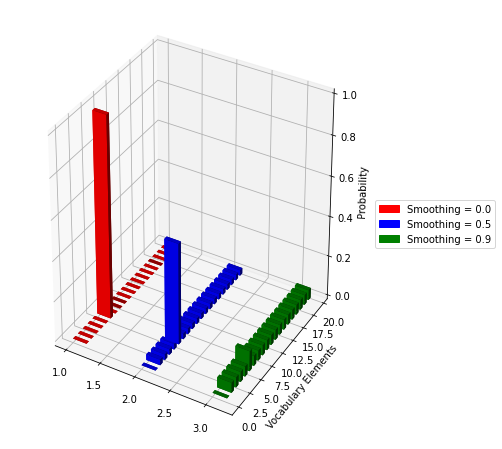

In [122]:
ls1 = LabelSmoothing(20, 0, 0.0)
ls2 = LabelSmoothing(20, 0, 0.5)
ls3 = LabelSmoothing(20, 0, 0.9)


X = torch.from_numpy(np.random.uniform(size=20)).unsqueeze(0)
Y = torch.from_numpy(np.array([[5]])).long().unsqueeze(0)

ls1(X.contiguous().view(-1, X.size(-1)),  Y.contiguous().view(-1))
ls2(X.contiguous().view(-1, X.size(-1)),  Y.contiguous().view(-1))
ls3(X.contiguous().view(-1, X.size(-1)),  Y.contiguous().view(-1))

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

x = [1,2,3]
colours = ['red','blue','green']
temp = [1,2,3]
temp2 = ['red','blue','green']

for i in range(0,19):
    x = np.hstack((x,temp))
    colours = np.hstack((colours,temp2))

y = np.repeat(range(0,20),3)

z = np.zeros(60)

dx = np.repeat([0.2],60)
dy = np.repeat([0.5],60)

temp = np.vstack((ls1.true_dist.numpy()[0],ls2.true_dist.numpy()[0]))
dz = np.vstack((temp, ls3.true_dist.numpy()[0])).T.flatten()

ax.bar3d(x, y, z, dx, dy, dz, shade=True, color=colours)
red_patch = mpatches.Patch(color='red', label='Smoothing = 0.0')
blue_patch = mpatches.Patch(color='blue', label='Smoothing = 0.5')
green_patch = mpatches.Patch(color='green', label='Smoothing = 0.9')

# box = ax.get_position()

# ax.set_position([box.x0, box.y0, box.width*0.65, box.height])
# legend_x = 1
# legend_y = 0.5

ax.legend(handles=[red_patch, blue_patch, green_patch], bbox_to_anchor=(legend_x, legend_y), loc='center left')
ax.set_zlabel('Probability')
ax.set_ylabel('Vocabulary Elements')


## Comparison of how label smoothing increases loss if too confident inspired by OpenNMT blog

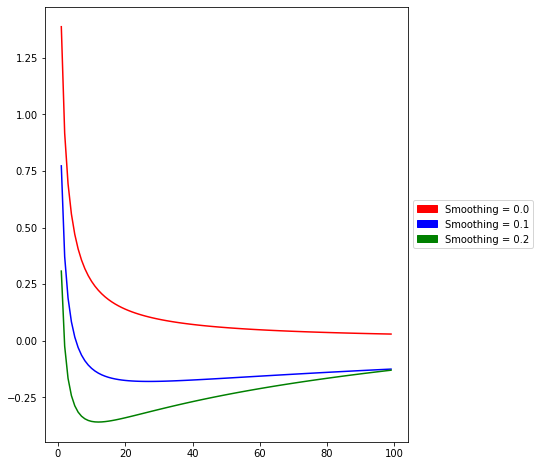

In [3]:
ls1 = LabelSmoothing(20, 0, 0.0)
ls2 = LabelSmoothing(20, 0, 0.1)
ls3 = LabelSmoothing(20, 0, 0.2)

loss_array1 = []
loss_array2 = []
loss_array3 = []


for i in np.arange(1,100):
    temp = np.zeros(20)
    d = i + 3 * 1
    temp[1:] = 1/d
    temp[5] = i/d
    X = torch.from_numpy(temp).log().unsqueeze(0)
    Y = torch.from_numpy(np.array([[5]])).long().unsqueeze(0)   
    loss1 = ls1(X.contiguous().view(-1, X.size(-1)),  Y.contiguous().view(-1)).item()
    loss_array1.append(loss1)
    loss2 = ls2(X.contiguous().view(-1, X.size(-1)),  Y.contiguous().view(-1)).item()
    loss_array2.append(loss2)
    loss3 = ls3(X.contiguous().view(-1, X.size(-1)),  Y.contiguous().view(-1)).item()
    loss_array3.append(loss3)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

red_patch = mpatches.Patch(color='red', label='Smoothing = 0.0')
blue_patch = mpatches.Patch(color='blue', label='Smoothing = 0.1')
green_patch = mpatches.Patch(color='green', label='Smoothing = 0.2')

box = ax.get_position()

ax.set_position([box.x0, box.y0, box.width*0.65, box.height])
legend_x = 1
legend_y = 0.5

ax.legend(handles=[red_patch, blue_patch, green_patch], bbox_to_anchor=(legend_x, legend_y), loc='center left')
ax.plot(np.arange(1,100), loss_array1, color='red')
ax.plot(np.arange(1,100), loss_array2, color='blue')
ax.plot(np.arange(1,100), loss_array3, color='green')

In [2]:
import torch
from torchvision import transforms
import numpy as np
import time
import glob
import random
import argparse
import h5py
import json
import torch.nn.init as init
import pandas as pd

from vasnet_tools import *
from vst import *
from vst_keyframe import *
from main import *

args = make_arg_parser().parse_args('--model_dir models/new_models/ --feed_forward_size 4096'.split())

parameters = Parameters(args)

split_file = parameters.splits[0]

dataset_name, dataset_type, splits = parse_splits_filename(split_file)
if dataset_type:
    datasets = parameters.datasets
else:
    datasets = [filename for filename in parameters.datasets if dataset_name in filename]

if parameters.model == "importance_score":
    vst = VST(parameters)
elif parameters.model == "keyframe":
    vst = VST_keyframe(parameters)

vst.load_h5_datasets(datasets, dataset_name)
vst.splits = splits
vst.split_file = split_file 
vst.dataset_type = dataset_type
vst.get_split_at(0, datasets[0])

model_file = os.path.splitext(os.path.basename(split_file))[0]
filename = parameters.model_dir+parameters.model+'_'+model_file+'_1'

print(f"——— Loading model from file {filename}")
vst.load_model_from_file(filename)

summary = vst.eval_single(0, vst.test_keys[2])

print(summary)

——— Initialising VST keyframe
——— Loading model from file models/keyframe/keyframe/keyframe_tvsum_splits_4
— Evaluating Test Samples: eccv16_dataset_tvsum_google_pool5/video_33
(array([1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05,
       1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05,
       1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05,
       1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05,
       1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05,
       1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05,
       1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05,
       1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05,
       1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05,
       1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05,
       1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.e-05,
       1.e-05, 1.e-05, 1.e-05, 1.e-05, 1.

Text(0, 0.5, 'User summary')

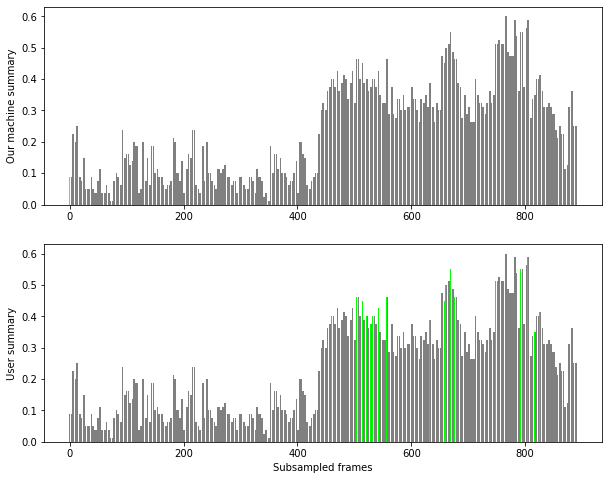

In [3]:
scores = summary[3]['gtscore']
result = summary[1][summary[3]['picks']]
colours = list(map(lambda x: 'orange' if x else 'grey', result))
user_colours = list(map(lambda x: 'lime' if x else 'grey', summary[3]['gtsummary']))

fig2 = plt.figure(figsize=(10,8))
# fig2.suptitle('Comparison of our generated summary and the ground truth user summary for TVSum video 23')
ax1 = fig2.add_subplot(211)
ax2 = fig2.add_subplot(212)
ax1.bar(range(0,len(scores)), scores, color=colours)
ax1.set_ylabel('Our machine summary')


ax2.bar(range(0,len(scores)), scores, color=user_colours)
ax2.set_xlabel('Subsampled frames')
ax2.set_ylabel('User summary')

# plt.savefig("comparison_scores.png")



In [18]:
for param in vst.model.parameters():
  print(param.data)

,  0.0242, -0.0551],
        [ 0.0118,  0.0367,  0.0110,  ..., -0.0098, -0.0466, -0.0294],
        [ 0.0284, -0.0235,  0.0399,  ...,  0.0359,  0.0009, -0.0371],
        ...,
        [ 0.0499, -0.0266, -0.0345,  ...,  0.0378, -0.0326, -0.0286],
        [ 0.0391,  0.0274,  0.0509,  ..., -0.0334,  0.0300, -0.0283],
        [-0.0421, -0.0080,  0.0113,  ..., -0.0376, -0.0086, -0.0314]])
tensor([ 0.0063, -0.0173,  0.0083,  ...,  0.0136, -0.0294,  0.0214])
tensor([[-0.0413,  0.0166, -0.0521,  ..., -0.0413,  0.0006, -0.0025],
        [ 0.0087,  0.0030,  0.0449,  ...,  0.0074,  0.0200, -0.0340],
        [-0.0165, -0.0334, -0.0408,  ..., -0.0392, -0.0386, -0.0138],
        ...,
        [-0.0444, -0.0126,  0.0176,  ..., -0.0246,  0.0383,  0.0408],
        [ 0.0397, -0.0037, -0.0089,  ...,  0.0042, -0.0030, -0.0022],
        [ 0.0152, -0.0513,  0.0167,  ...,  0.0049, -0.0261,  0.0434]])
tensor([ 0.0066, -0.0182,  0.0066,  ...,  0.0148, -0.0274,  0.0208])
tensor([[ 0.0472, -0.0104,  0.0407,  ...,  

In [30]:
layers = torch.load(filename, map_location=torch.device('cpu'))['encoder_attention']
decoder_layers = torch.load(filename, map_location=torch.device('cpu'))['decoder_attention']
attention_matrix = layers[0].self_attn.attn[0,1].data.numpy()
print(decoder_layers)


ModuleList(
  (0): DecoderLayer(
    (self_attn): MultiHeadedAttention(
      (linears): ModuleList(
        (0): Linear(in_features=1024, out_features=1024, bias=True)
        (1): Linear(in_features=1024, out_features=1024, bias=True)
        (2): Linear(in_features=1024, out_features=1024, bias=True)
        (3): Linear(in_features=1024, out_features=1024, bias=True)
      )
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (src_attn): MultiHeadedAttention(
      (linears): ModuleList(
        (0): Linear(in_features=1024, out_features=1024, bias=True)
        (1): Linear(in_features=1024, out_features=1024, bias=True)
        (2): Linear(in_features=1024, out_features=1024, bias=True)
        (3): Linear(in_features=1024, out_features=1024, bias=True)
      )
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (feed_forward): PositionwiseFeedForward(
      (w_1): Linear(in_features=1024, out_features=4096, bias=True)
      (w_2): Linear(in_features=4096, out_features=10

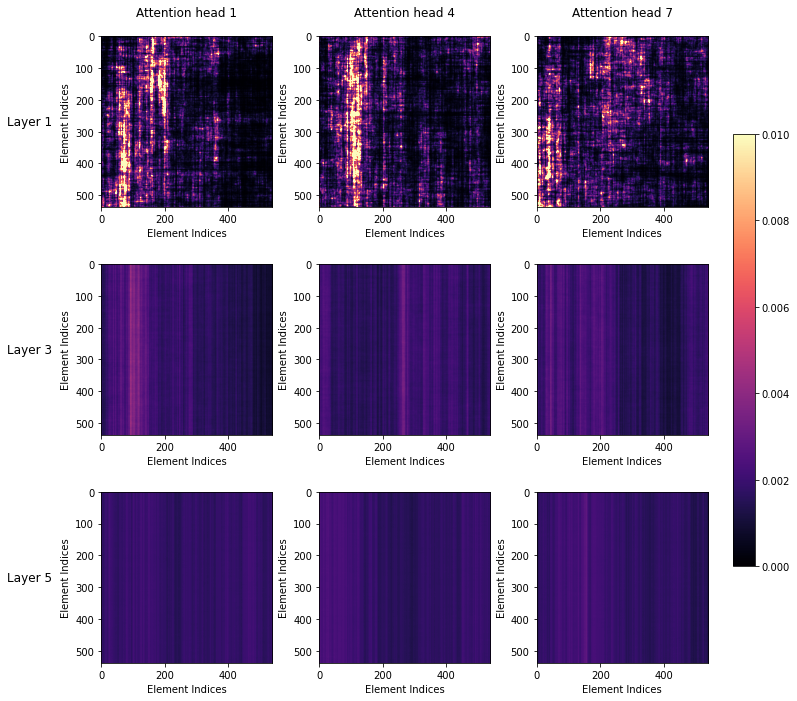

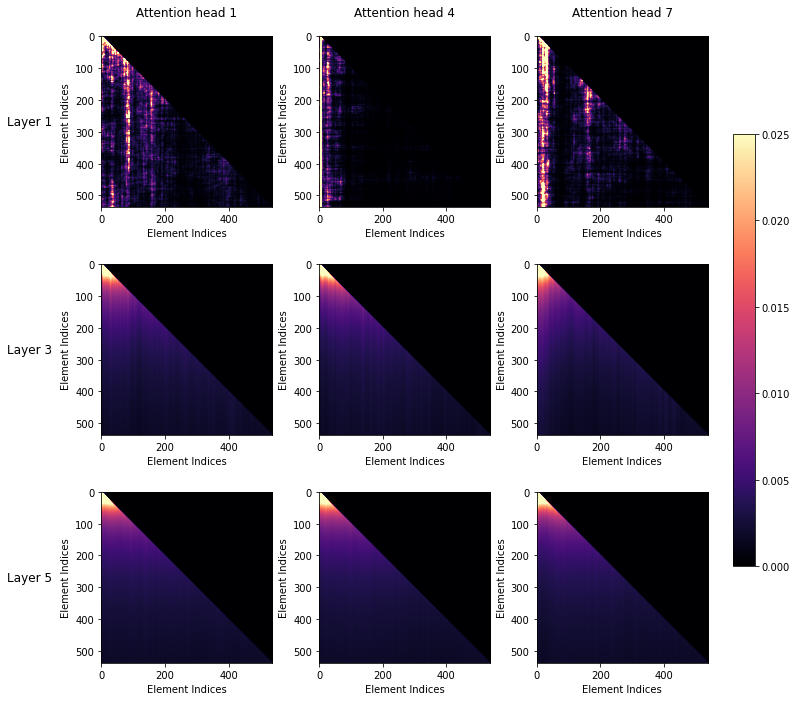

In [118]:


def create_diagram(layers, title, vmin=0, vmax=1):
    fig_, axes1 = plt.subplots(3,3, figsize=(10,10))
    for i in np.arange(0, len(layers), 2):
        for h in range(3):
            im = axes1[int(i/2)][h].imshow(layers[i].self_attn.attn[0,h*3].data.numpy(), cmap='magma',vmin=vmin, vmax=vmax)
            axes1[int(i/2)][h].set_ylabel(f"Element Indices")
            axes1[int(i/2)][h].set_xlabel(f"Element Indices")


    cbaxes = fig_.add_axes([0.85, 0.1, 0.2, 0.8]).set_axis_off()
    fig_.colorbar(im, ax=cbaxes)
    cbar.ax.set_ylabel('Relative attention value', rotation=-90, va="bottom")

    for ax, col in zip(axes1[0], range(3)):
        ax.annotate(f"Attention head {col*3+1}", xy=(0.5, 1), xytext=(0, 20),
                    xycoords='axes fraction', textcoords='offset points',
                    size='large', ha='center', va='baseline')

    for ax, i in zip(axes1[:,0], np.arange(0, len(layers), 2)):
        ax.annotate(f"Layer {i+1}", xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - 5, 0),
                    xycoords=ax.yaxis.label, textcoords='offset points',
                    size='large', ha='right', va='center')

    # fig_.suptitle(title, fontsize=25, y=1.06)

    fig_.tight_layout()
    
    # plt.savefig(title+".png")

    plt.show()



create_diagram(layers, "Visualisation of Attention Heads in Encoder Layers", 0, 0.01)
create_diagram(decoder_layers,"Visualisation of Attention Heads in Decoder Layers",0,0.025)

